# SD212: Graph mining
## Lab 3: PageRank

In this lab, you will learn to compute, use and interpret various [PageRank](https://en.wikipedia.org/wiki/PageRank) scores.

## Import

In [1]:
from IPython.display import SVG

In [3]:
import numpy as np
from scipy import sparse

In [4]:
from sknetwork.data import load_netset, linear_graph, miserables
from sknetwork.linalg import normalize
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.visualization import svg_graph

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paris.fr/) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [5]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

The PageRank corresponds to the stationary distribution of a random walk with restart probability $1-\alpha$. Unless otherwise specified, we take the default value $\alpha = 0.85$ and the restart probability distribution is uniform over the set of nodes.

## Linear graph

Consider a linear graph:

In [6]:
n = 10

In [7]:
graph = linear_graph(n, True)
adjacency = graph.adjacency
position = graph.position

In [8]:
image = svg_graph(adjacency, position, names=np.arange(n))

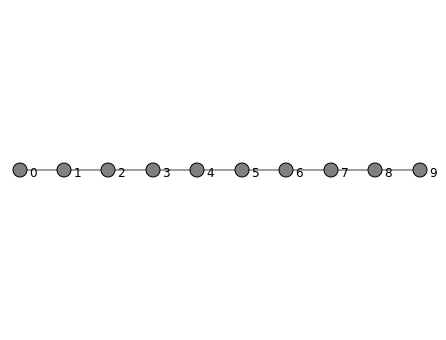

In [9]:
SVG(image)

## To do

* What are the two best ranked nodes? Try with different values of $\alpha$ and interpret the results.
* What is the **exact** PageRank vector when $\alpha=1$? You need to compute it!

In [10]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [11]:
scores = pagerank.fit_transform(adjacency)

In [12]:
image = svg_graph(adjacency, position, names=np.arange(n), scores=scores)

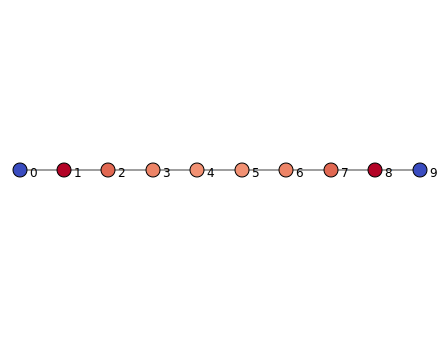

In [13]:
SVG(image)

## Les Misérables


In [14]:
graph = miserables(True)

In [15]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [16]:
image = svg_graph(adjacency, position, names, scale=2)

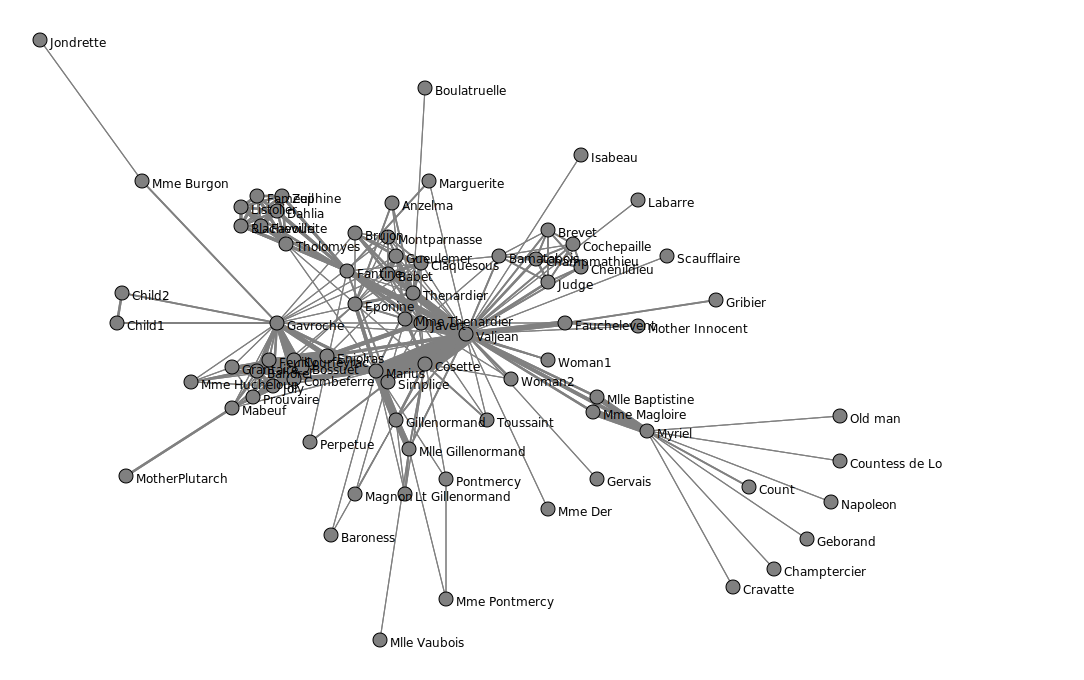

In [17]:
SVG(image)

## To do

* Display the graph with PageRank scores.
* List the 10 best ranked characters.
* Compare with the 10 nodes of highest degrees and the 10 nodes of highest weights.
* Try different values of $\alpha$ (e.g., 0.1, 0.9, 0.99) and interpret the results.

In [18]:
pagerank = PageRank(damping_factor=0.85, solver='lanczos')

In [19]:
scores = pagerank.fit_transform(adjacency)

In [20]:
# scores in log scale are more visible
image = svg_graph(adjacency, position, names, scores=np.log(scores), scale=2)

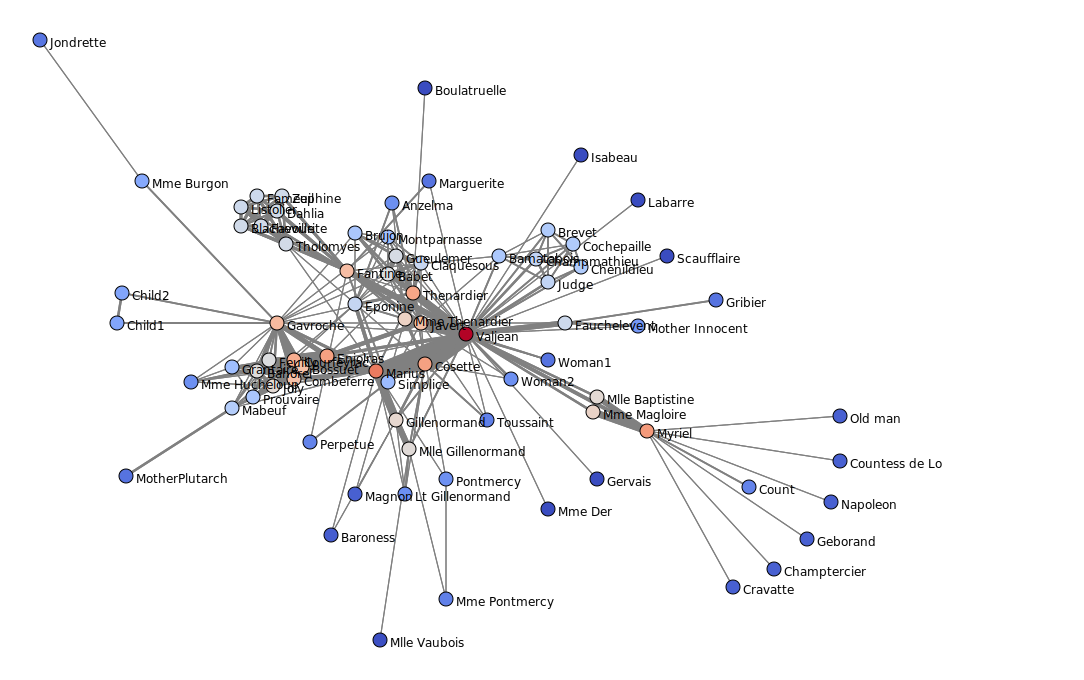

In [21]:
SVG(image)

In [22]:
top_nodes = top_k(scores, 10)

In [23]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

1 Valjean
2 Marius
3 Myriel
4 Cosette
5 Enjolras
6 Thenardier
7 Courfeyrac
8 Gavroche
9 Fantine
10 Javert


## Openflights


In [ ]:
graph = openflights

In [ ]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, display_node_weight=True, display_edges=False)

In [ ]:
SVG(image)

## To do

* Display the same world map with PageRank scores.
* List the 10 best ranked airports, and compare with the 10 airports of highest traffic.
* Display the world map with Personalized PageRank scores, starting from Tokyo international airport.
* List the corresponding 10 best ranked airports.

In [ ]:
pagerank = PageRank()

In [ ]:
scores = pagerank.fit_transform(adjacency)

In [ ]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), width=800, height=400, display_node_weight=True, display_edges=False)

In [ ]:
SVG(image)

In [ ]:
top_nodes = top_k(scores, 10)

In [ ]:
for i, node in enumerate(top_nodes):
    print(i + 1, names[node])

In [ ]:
tokyo = 1084

In [ ]:
pagerank = PageRank()

In [ ]:
scores = pagerank.fit_transform(adjacency, seeds = {tokyo: 1})

In [ ]:
image = svg_graph(adjacency, position, scores=np.log(scores), node_order=np.argsort(scores), width=800, height=400, display_node_weight=True, display_edges=False) 

In [ ]:
SVG(image)

## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* List the 10 best ranked pages of Wikipedia Vitals.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees. Interpret the results.
* Which article of Wikipedia Vitals is in the top-20 of PageRank but not in the top-20 of in-degrees?

In [ ]:
pagerank = PageRank(solver='lanczos')

In [ ]:
scores = pagerank.fit_transform(adjacency)

## To do

* List the 20 closest pages to **Picasso** in Wikipedia Vitals. What is the best ranked painter other than Picasso?
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.
* In both cases, propose a method to get the 20 closest pages **specifically** related to the target(s). <br>
**Hint:** Consider the difference between two PageRank scores.

In [ ]:
picasso = 4936

In [ ]:
cat = 1401

In [ ]:
dog = 1395

## 3. Bipartite graphs

## Cinema

In [ ]:
graph = cinema

In [ ]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* List the top-10 movies in terms of PageRank.
* List the 5 closest movies to **Mon Oncle**. 
* List the 5 closest actors to **Catherine Deneuve**.

In [ ]:
pagerank = BiPageRank()

In [ ]:
pagerank.fit(biadjacency)

## 4. Directed graphs as bipartite graphs

Directed graphs can be represented as bipartite graphs by duplicating each node, one as source of edges and the other as destination of edges. The biadjacency matrix of the bipartite graph is simply the adjacency matrix of the directed graph. 

The PageRank scores obtained with the bipartite graph differ from those obtained with the directed graph: they correspond to the **forward-backward** random walk in the directed graph, edges being alternately followed in forward and backward directions.

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

Do the same experiments as above using BiPageRank:
* List the 10 best ranked pages of Wikipedia Vitals. Give 2 rankings: one for rows, the other for columns.
* Compare with the 10 nodes of highest out-degrees and the 10 nodes of highest in-degrees, respectively.<br> Interpret the results.

## To do

Using BiPageRank:
* List the 20 closest pages to **Picasso** in Wikipedia Vitals. 
* List the 20 closest pages to both **Cat** and **Dog** in Wikipedia Vitals.

In your opinion, what is the best algorithm for finding related pages in Wikipedia, PageRank or BiPageRank?<br>
Justify your answer.